In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


In [39]:
df = pd.read_csv("/kaggle/input/test-file/tested.csv")

In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [44]:
df['Age']

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

In [45]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [46]:
df['Age'].isnull().sum()

0

In [47]:
df['Fare'].fillna(df['Fare'].median(),inplace = True)

<ipython-input-47-044519d06787>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].median(),inplace = True)


In [48]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [49]:
df = df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1)


In [50]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,27.0,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,27.0,0,0,8.0500,S


In [51]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [52]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,Q
1,1,3,1,47.0,1,0,7.0000,S
2,0,2,0,62.0,0,0,9.6875,Q
3,0,3,0,27.0,0,0,8.6625,S
4,1,3,1,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,0,27.0,0,0,8.0500,S
414,1,1,1,39.0,0,0,108.9000,C
415,0,3,0,38.5,0,0,7.2500,S
416,0,3,0,27.0,0,0,8.0500,S


In [53]:
df['Embarked'] = df['Embarked'].map({'Q':0, 'S':1, 'C':2})

<Axes: >

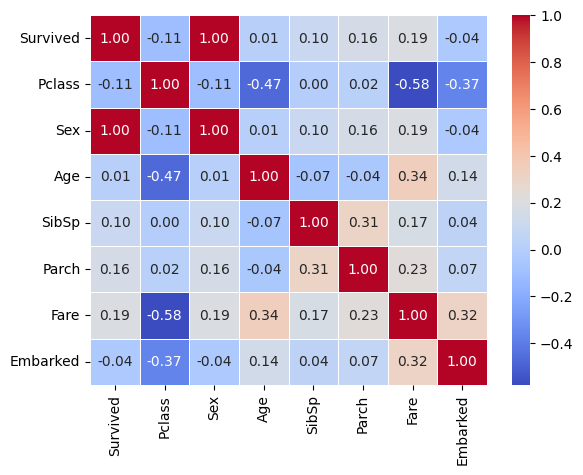

In [54]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [55]:
df=df.drop(['Age'],axis=1)

In [56]:
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,0,0,7.8292,0
1,1,3,1,1,0,7.0000,1
2,0,2,0,0,0,9.6875,0
3,0,3,0,0,0,8.6625,1
4,1,3,1,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,0,3,0,0,0,8.0500,1
414,1,1,1,0,0,108.9000,2
415,0,3,0,0,0,7.2500,1
416,0,3,0,0,0,8.0500,1


<Axes: >

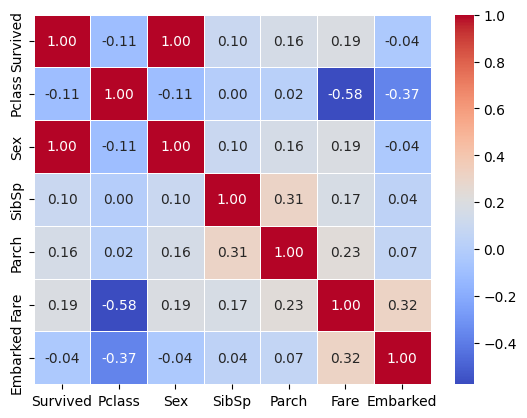

In [57]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [58]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(["Survived"], axis=1)  # Features
y = df["Survived"]  # Target variable

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [60]:
y_pred = model.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)  # Correct order
print(f"Accuracy using Random Forest Model: {accuracy:.2f}")


Accuracy using Random Forest Model: 1.00


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Step 1: Load and Prepare Data
X = df.drop("Survived", axis=1)  # Features
y = df["Survived"]  # Target variable

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define multiple models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Step 4: Train and Evaluate each model
accuracy_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    accuracy_scores[name] = accuracy  # Store accuracy

# Step 5: Print Accuracy for each model
for model, acc in accuracy_scores.items():
    print(f"{model}: {acc:.2f}")


Logistic Regression: 1.00
Random Forest: 1.00
Support Vector Machine: 0.61
Decision Tree: 1.00
Naive Bayes: 1.00
